In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
df=pd.read_csv("zomato.csv")
# zomato_real.head()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [30]:
# Data cleaning and featrure engineering
data=df.drop(['url','dish_liked','phone'],axis=1)

In [31]:
data.duplicated().sum()

43

In [32]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [33]:
#Remove the NaN values from the dataset
data.isnull().sum()
data.dropna(how='any',inplace=True)
data.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [34]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [35]:
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [36]:
data['cost'] = data['cost'].astype(str) #Changing the cost to string
data['cost'] = data['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
data['cost'] = data['cost'].astype(float) # Changing the cost to Float
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [37]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [38]:
#Removing '/5' from Rates
data = data.loc[data.rate !='NEW']
data = data.loc[data.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
data.rate = data.rate.apply(remove_slash).str.strip().astype('float')
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

[ True False]
bool
[ True False]
Number of 'Yes' values: 27081
Number of 'No' values: 14156


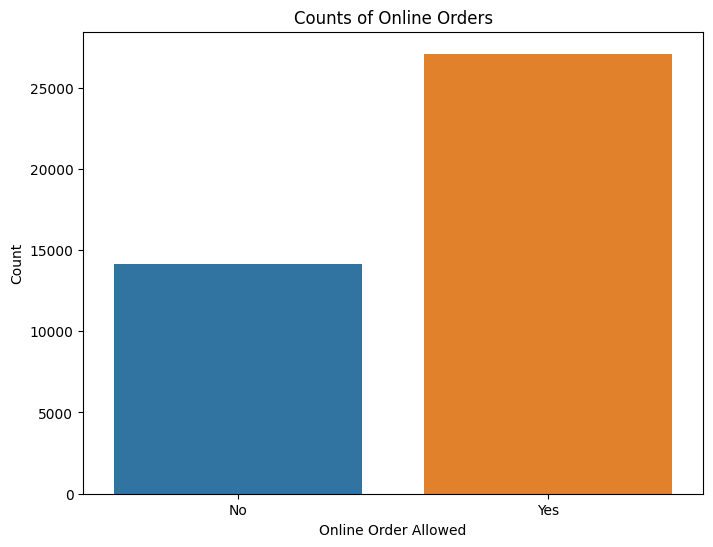

In [74]:
# Adjust the column names
# data.name = data.name.apply(lambda x:x.title())
# data.online_order.replace(('Yes','No'),(True, False),inplace=True)
# data.book_table.replace(('Yes','No'),(True, False),inplace=True)
# data.cost.unique()
# data['online_order'].sum()
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.countplot(data['online_order'])
# plt.title('Restaurants allowing table booking or not')  # Move the title before saving the plot
# plt.xlabel('Book Table')
# plt.ylabel('Count')
# plt.xticks([0, 1], ['No', 'Yes'])  # Assuming 0 represents 'No' and 1 represents 'Yes'
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.savefig("Book_Table.png")
# plt.show()
# Check unique values in 'online_order' column
print(data['online_order'].unique())

# Check data type of 'online_order' column
print(data['online_order'].dtype)

# Replacing 'Yes' and 'No' with True and False
data['online_order'].replace(('Yes', 'No'), (True, False), inplace=True)

# Check the replaced values
print(data['online_order'].unique())

# # Plotting
# sns.countplot(data['online_order'])
# plt.title('Restaurants allowing online ordering or not')
# plt.xlabel('Online Order')
# plt.ylabel('Count')
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.tight_layout()
# plt.savefig("Online_Order.png")
# plt.show()

# Count the number of 'Yes' and 'No' values in the 'online_order' column
online_order_counts = data['online_order'].value_counts()

# Print the counts
print("Number of 'Yes' values:", online_order_counts[True])
print("Number of 'No' values:", online_order_counts[False])
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of 'Yes' and 'No' values in the 'online_order' column
online_order_counts = data['online_order'].value_counts()


In [64]:
def Encode(z):
    for column in z.columns[~z.columns.isin(['rate', 'cost', 'votes'])]:
        z[column] = z[column].factorize()[0]
    return z

data_en = Encode(data.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

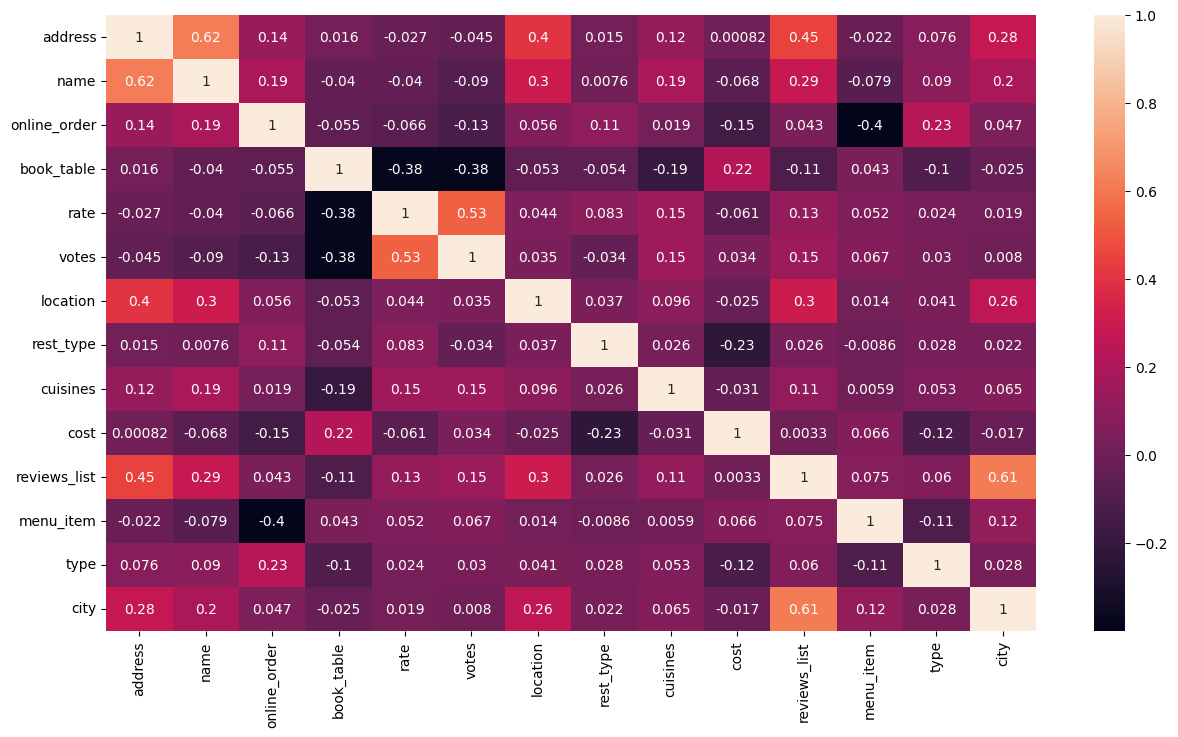

In [65]:
corr = data_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.savefig("correlation.png")
data_en.columns

In [43]:
#Defining the independent variables and dependent variables
x = data_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = data_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
# y_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
16950,0,1,0,8,2,5,250.0,0
767,0,1,131,8,4,278,400.0,190
6750,0,1,137,45,2,1295,250.0,0
9471,0,1,74,16,0,537,1.0,0
25162,0,1,61,12,2,1860,350.0,0


In [48]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.27362337221039346

In [49]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8533649992181221

In [50]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8774279501872895

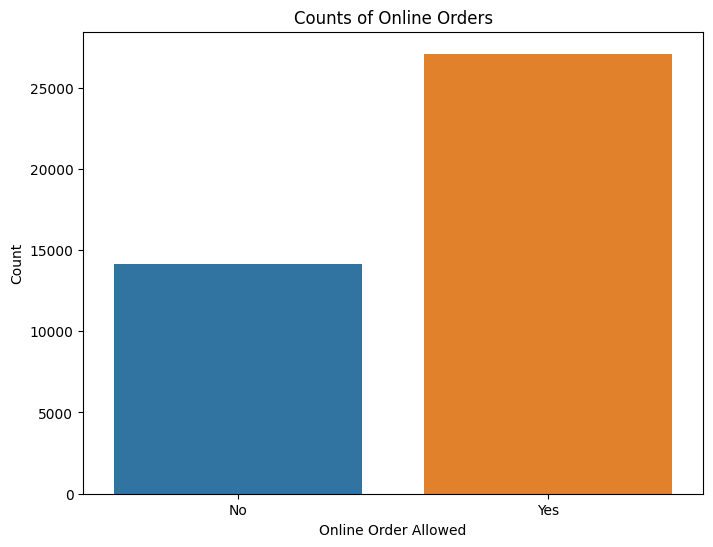

In [80]:
# Plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=online_order_counts.index, y=online_order_counts.values)

# Add labels and title
plt.title('Counts of Online Orders')
plt.xlabel('Online Order Allowed')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Set the tick labels to 'No' and 'Yes'
plt.savefig("online.png")
# Show plot
plt.show()

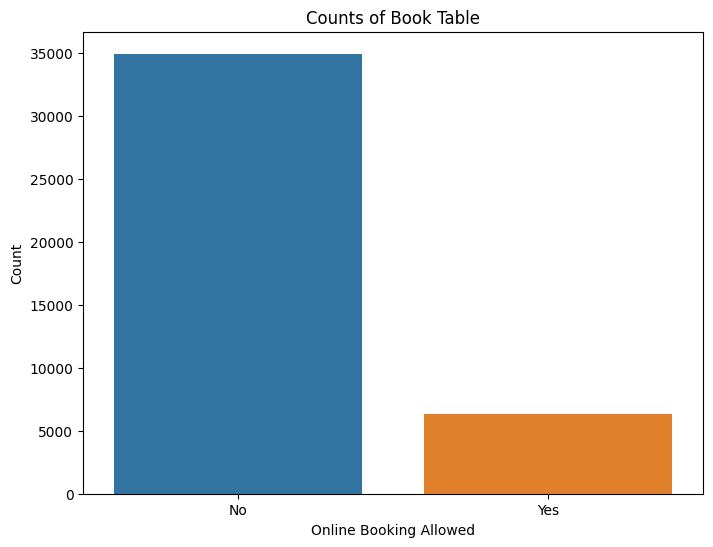

In [81]:
# Plot the counts
book_table_counts = data['book_table'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=book_table_counts.index, y=book_table_counts.values)

# Add labels and title
plt.title('Counts of Book Table')
plt.xlabel('Online Booking Allowed')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Set the tick labels to 'No' and 'Yes'
plt.savefig("Book_Table.png")
# Show plot
plt.show()

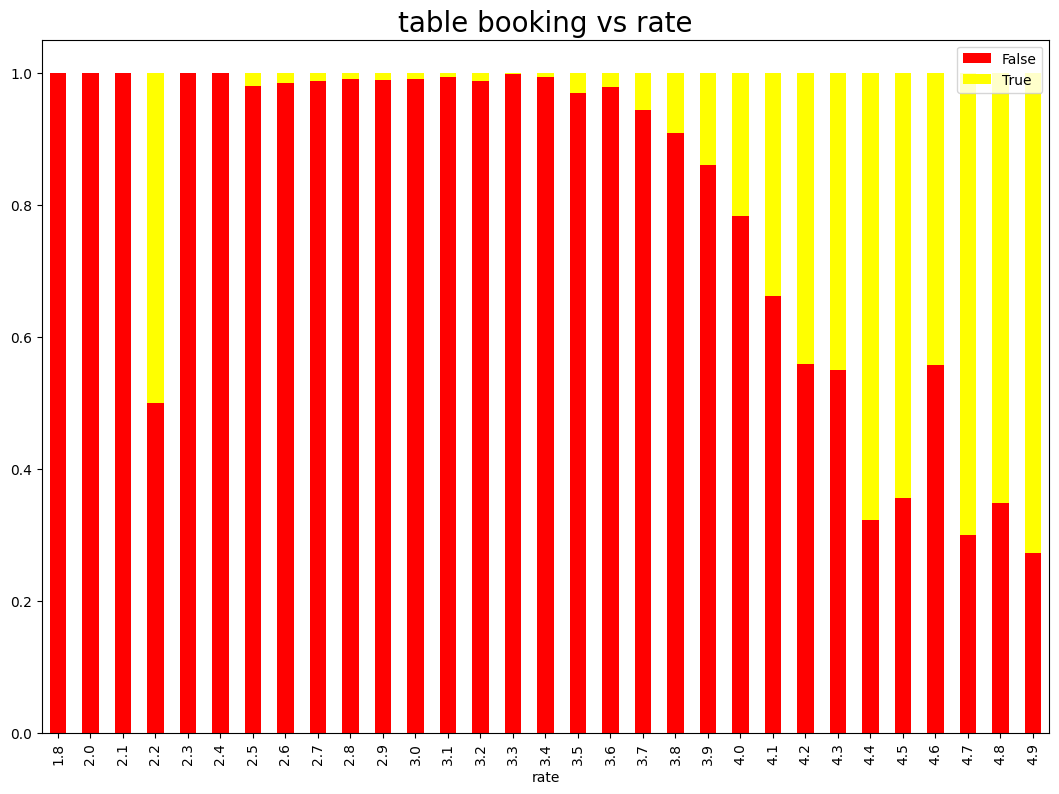

In [79]:
#Table booking Rate vs Rate
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(data['rate'], data['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.savefig("Table_Booking_Rate.png")
plt.show()

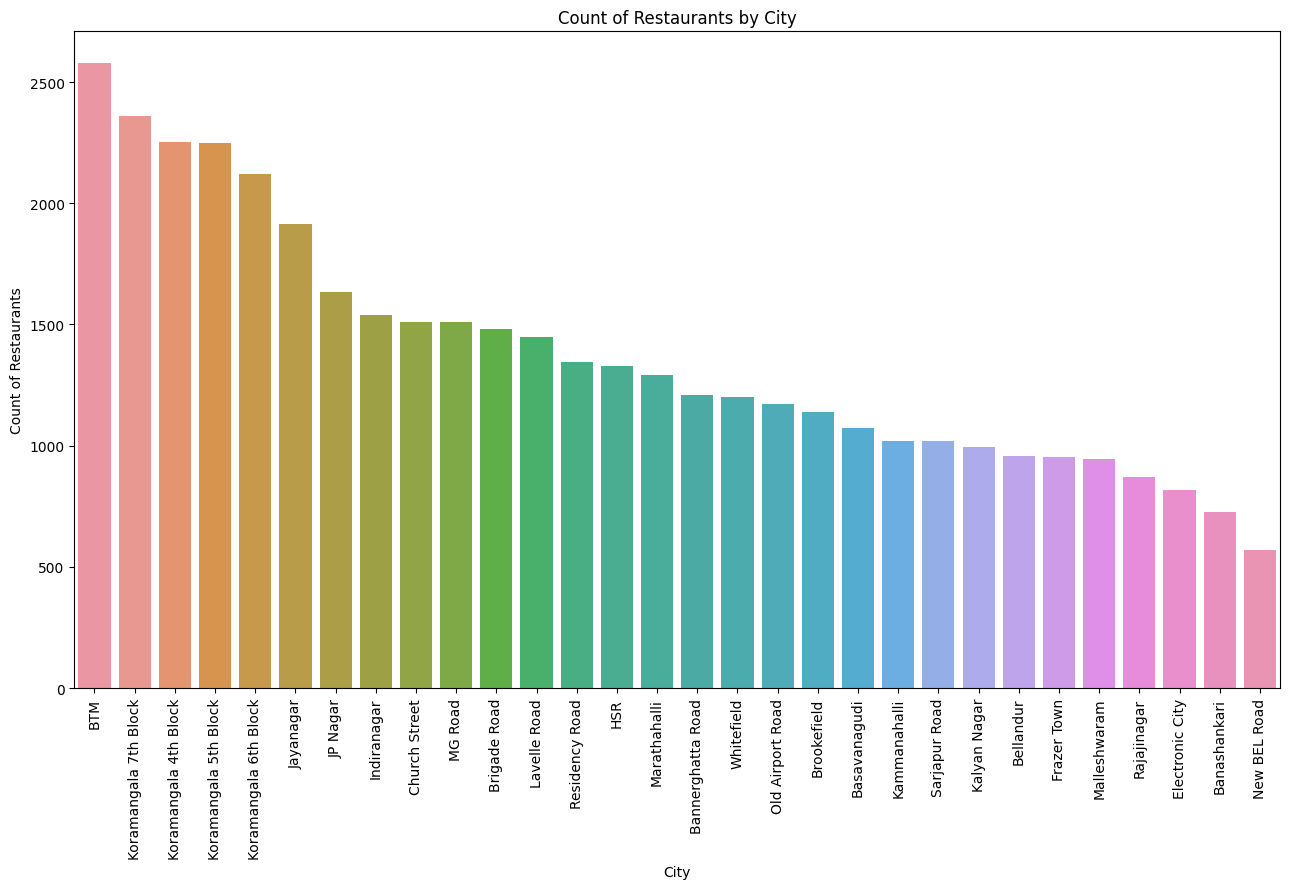

In [89]:
# Location
city_counts = data['city'].value_counts()

# Plot the count of restaurants by city
sns.countplot(data=data, x='city', order=city_counts.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Count of Restaurants')
plt.title('Count of Restaurants by City')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot
plt.savefig("Location.png")

# Display the plot
plt.show()


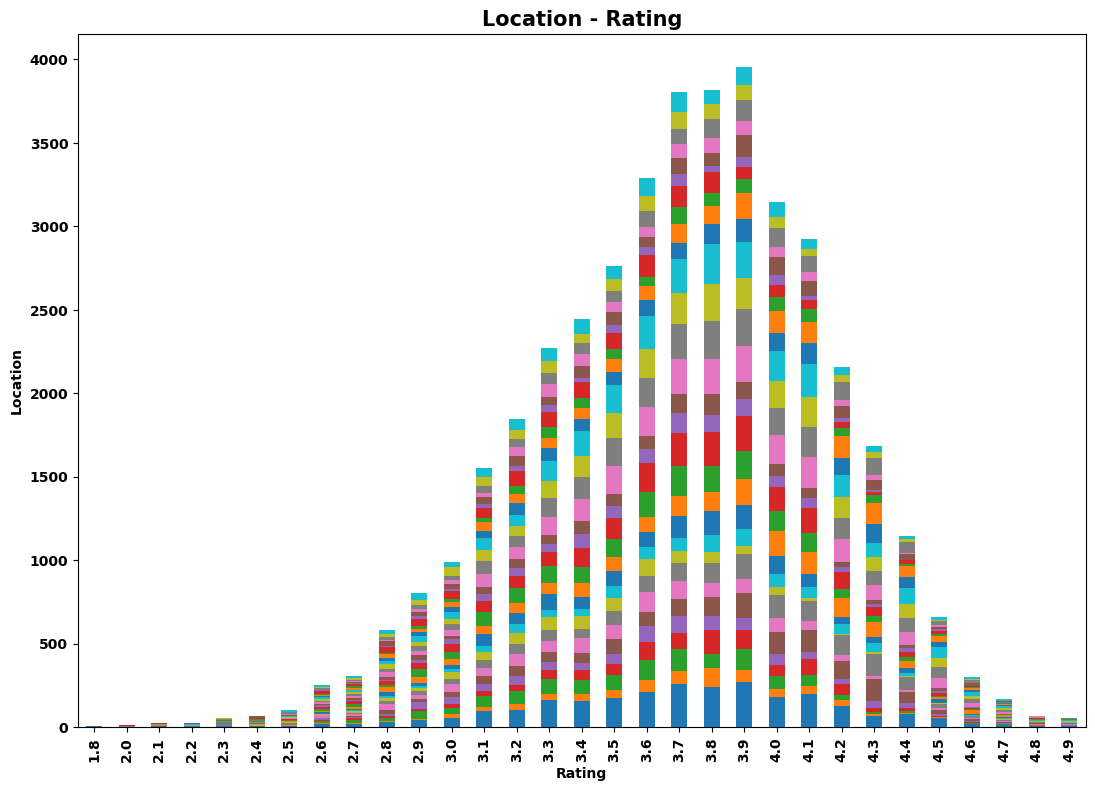

In [91]:
# location and rating
loc_plt=pd.crosstab(data['rate'],data['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();
plt.savefig("Location Rating.png")

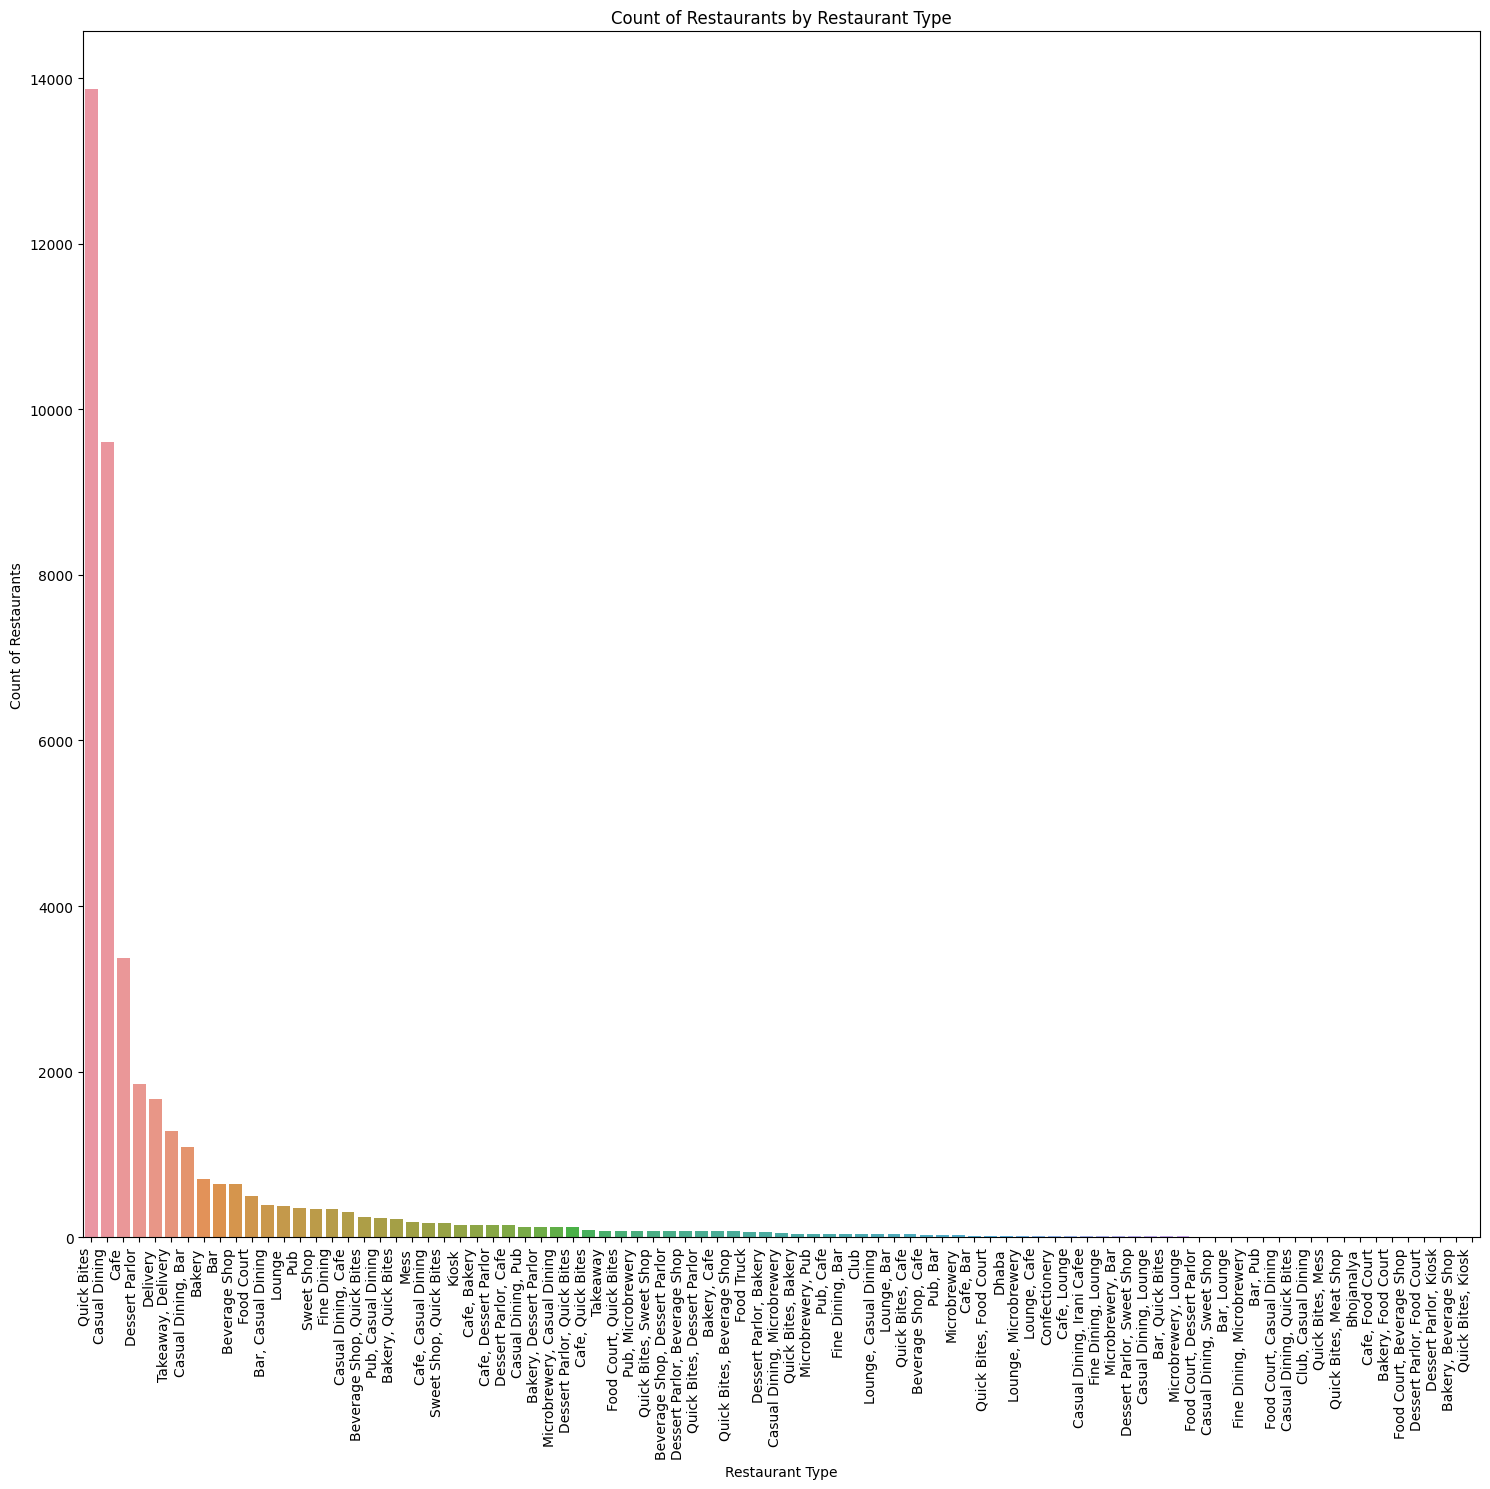

In [95]:
#Restaurant Type
plt.figure(figsize=(15, 15))
sns.countplot(data=data, x='rest_type', order=data['rest_type'].value_counts().index)
plt.xticks(rotation=90, ha="right")

# Add labels and title
plt.xlabel('Restaurant Type')
plt.ylabel('Count of Restaurants')
plt.title('Count of Restaurants by Restaurant Type')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot
plt.savefig("Restaurant_Type.png")

# Display the plot
plt.show()


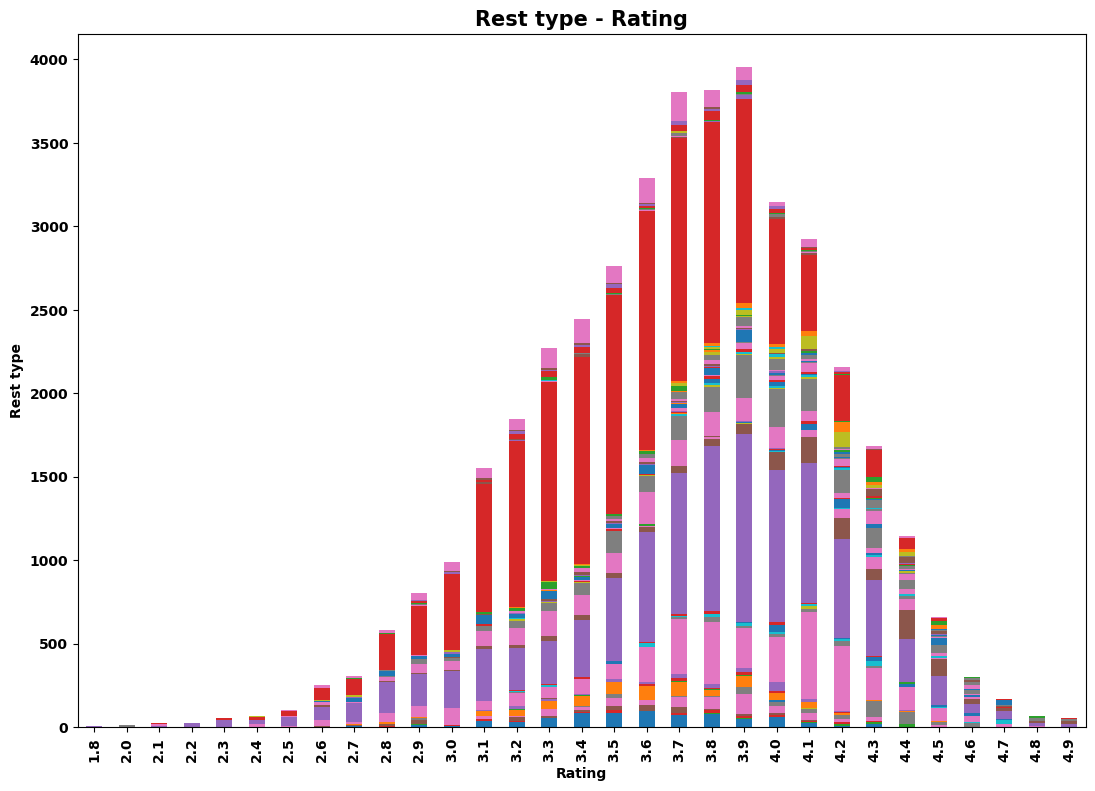

In [96]:
# Gaussian Rest type and Rating
loc_plt=pd.crosstab(data['rate'],data['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();
plt.savefig('Rest Type-Rating')

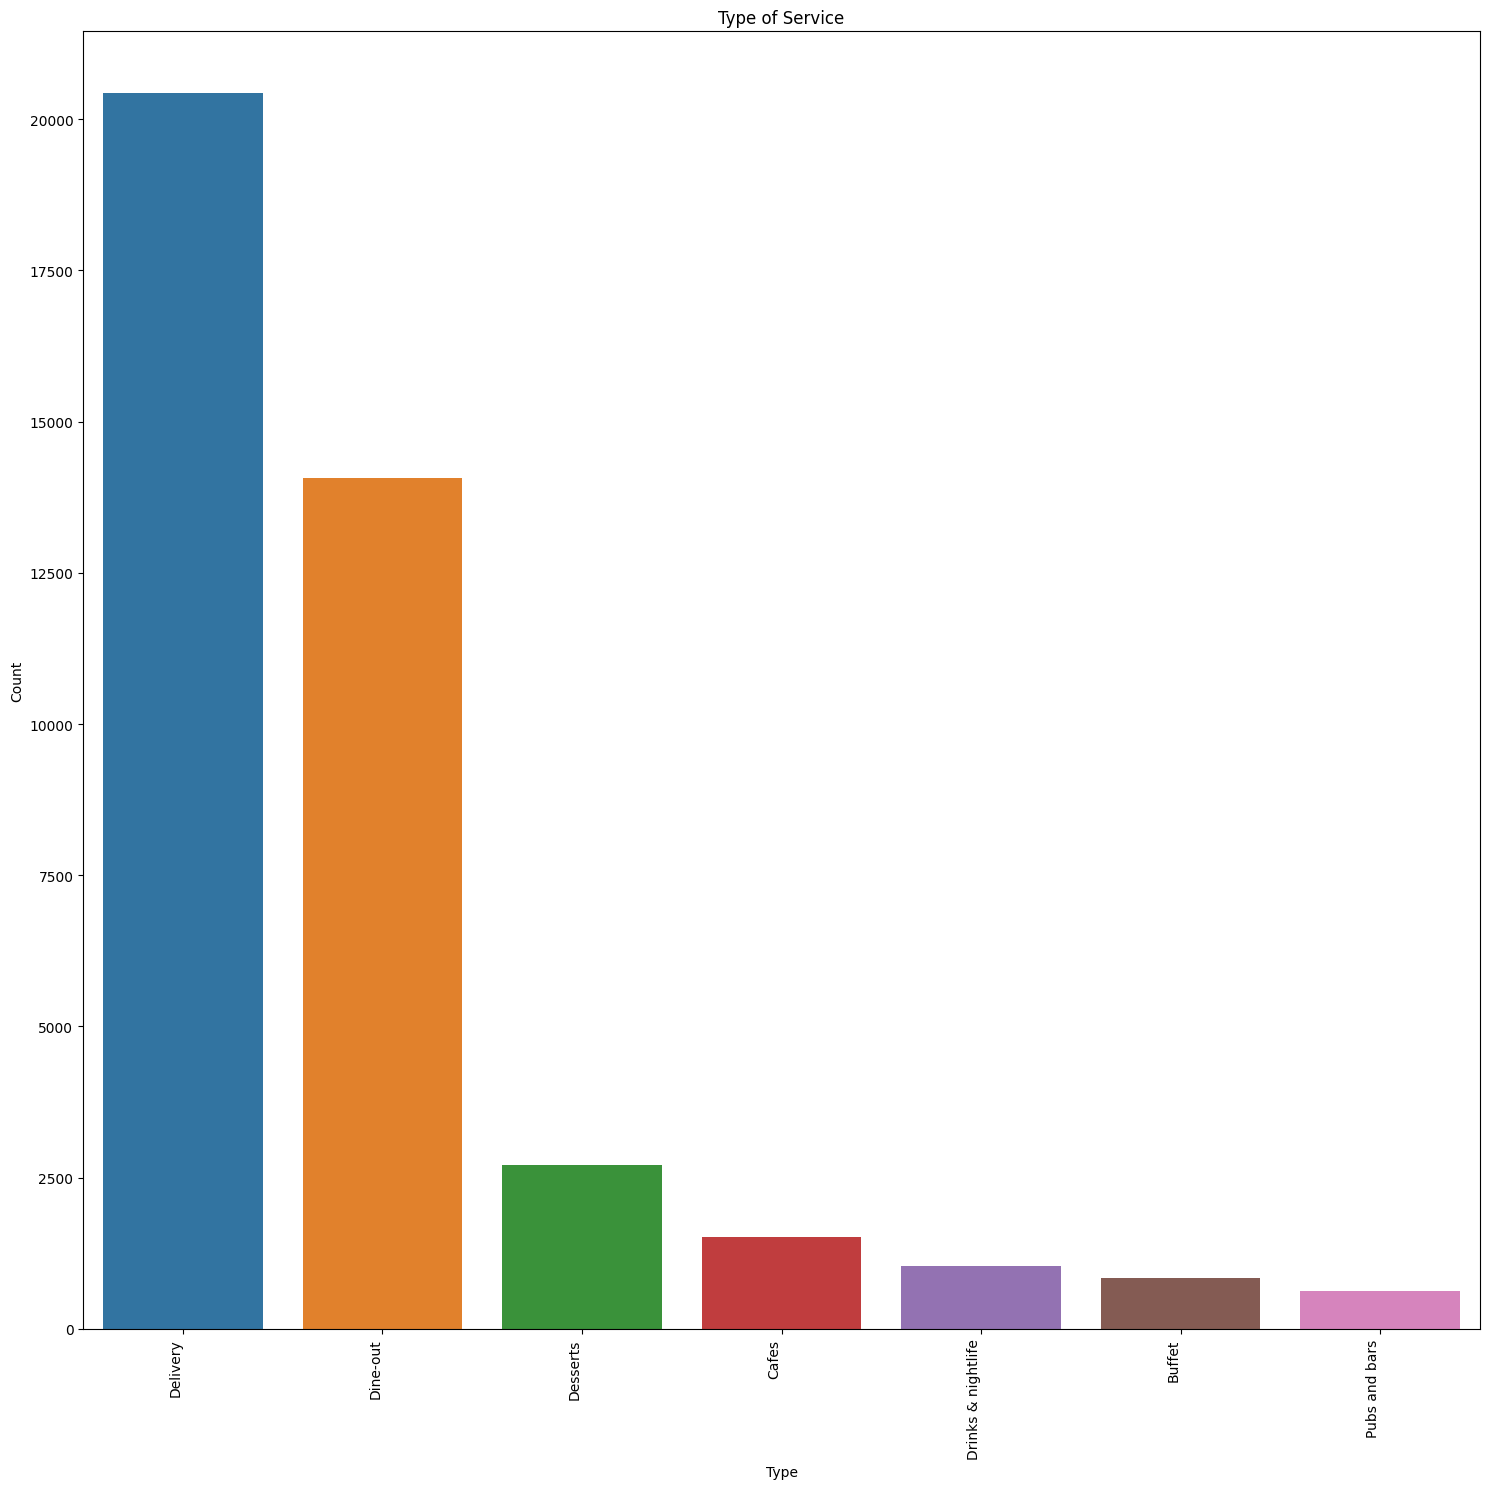

In [98]:
# Types of services
# Create a countplot for the 'type' column
plt.figure(figsize=(15, 15))
sns.countplot(data=data, x='type', order=data['type'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="right")

# Set title and labels
plt.title('Type of Service')
plt.xlabel('Type')
plt.ylabel('Count')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot
plt.savefig('Types_of_Service.png')

# Show the plot
plt.show()


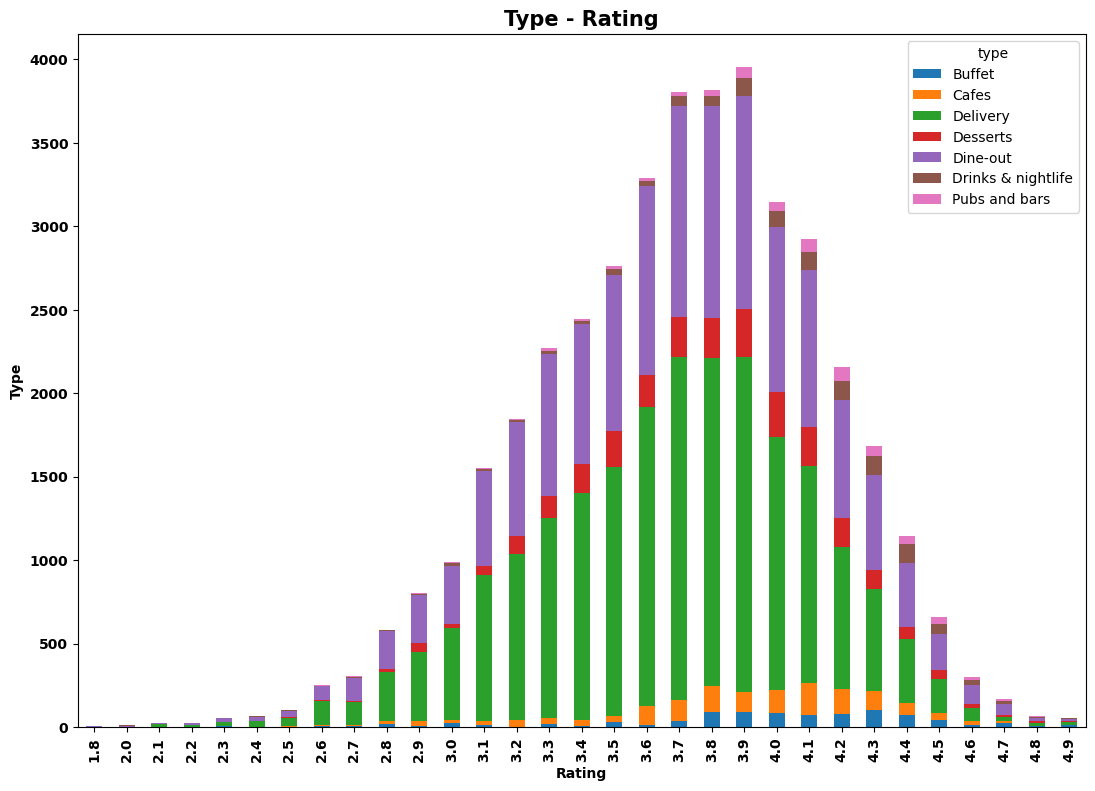

In [99]:
#Type and Rating
type_plt=pd.crosstab(data['rate'],data['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.savefig('Type and Rating')

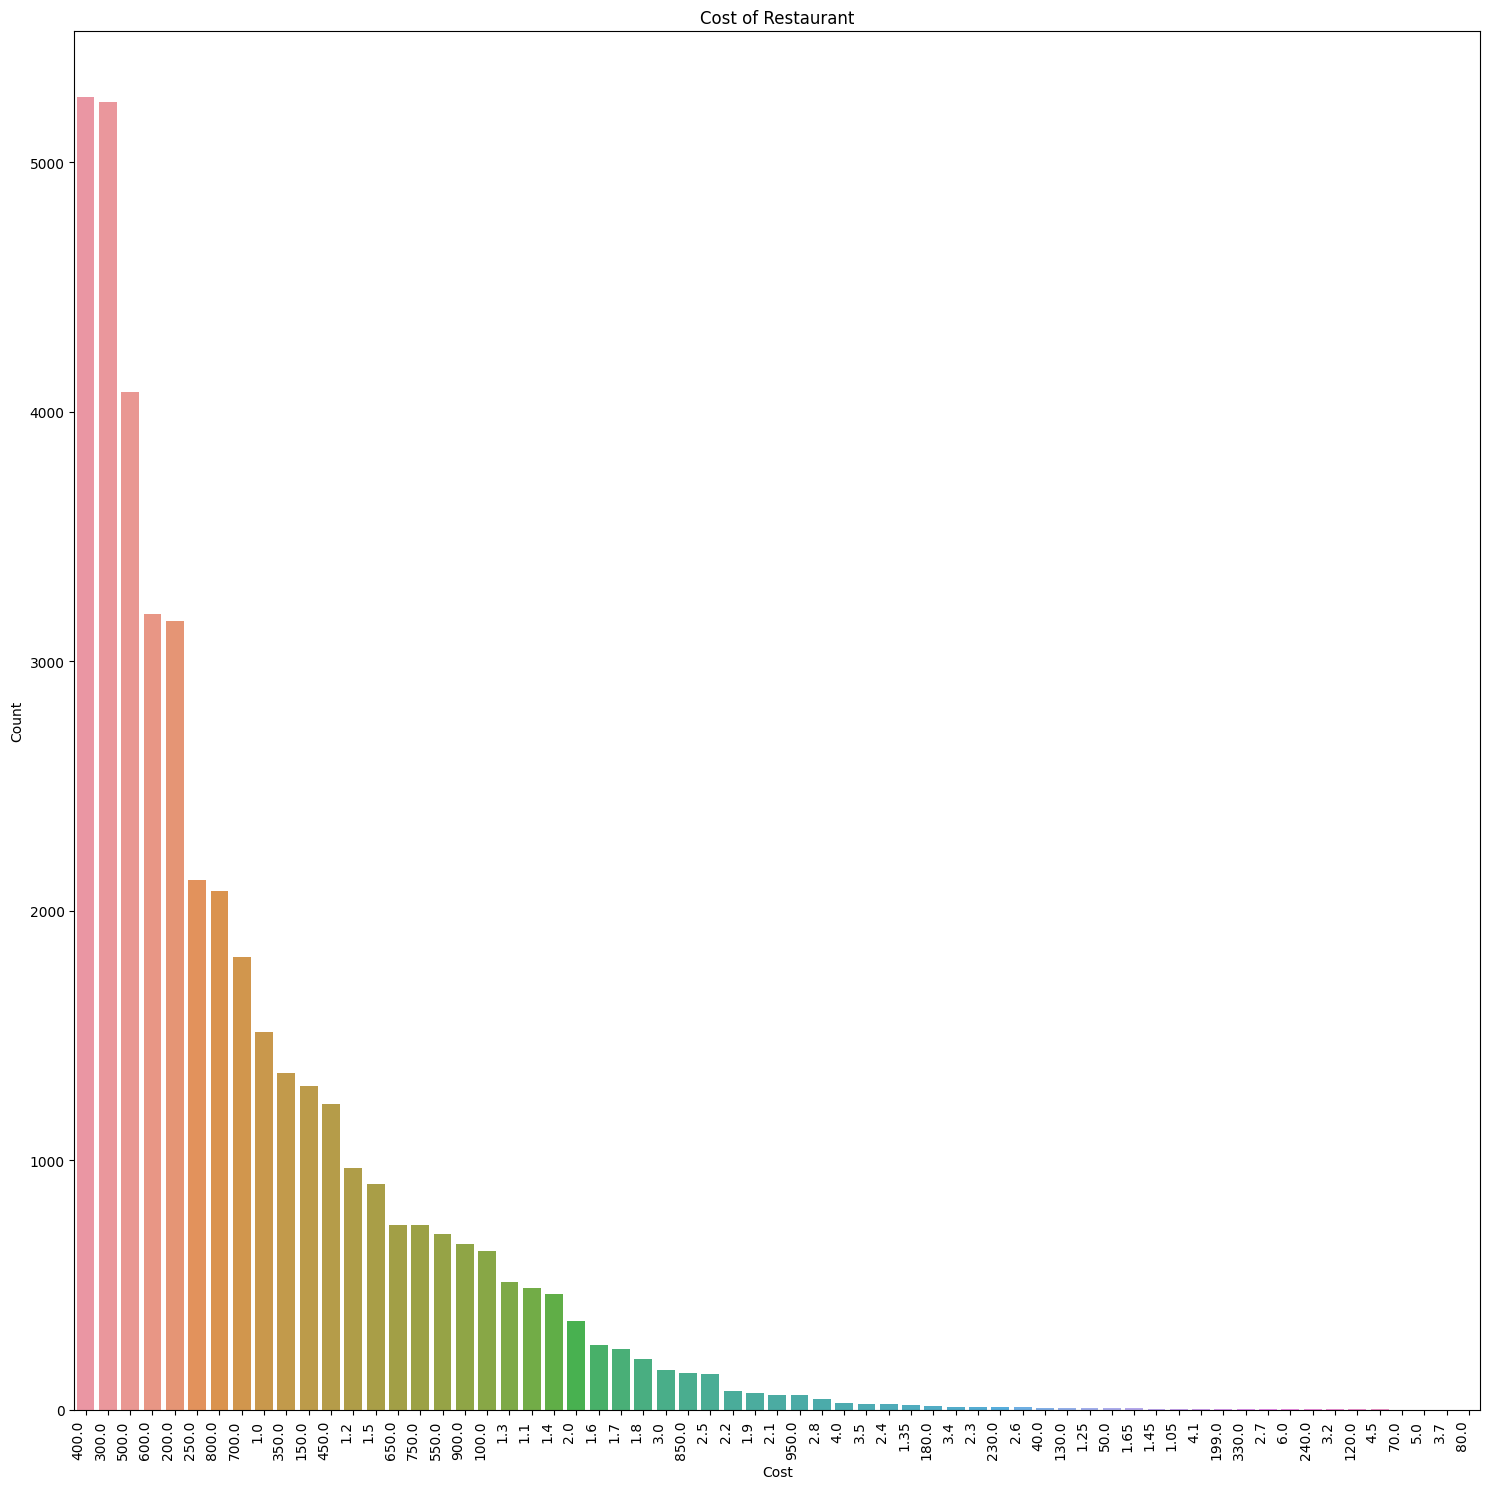

In [101]:
# Cost of Restuarant
# Create a countplot for the 'cost' column
plt.figure(figsize=(15, 15))
sns.countplot(data=data, x='cost', order=data['cost'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="right")

# Set title and labels
plt.title('Cost of Restaurant')
plt.xlabel('Cost')
plt.ylabel('Count')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot
plt.savefig('Cost_of_Restaurant.png')

# Show the plot
plt.show()


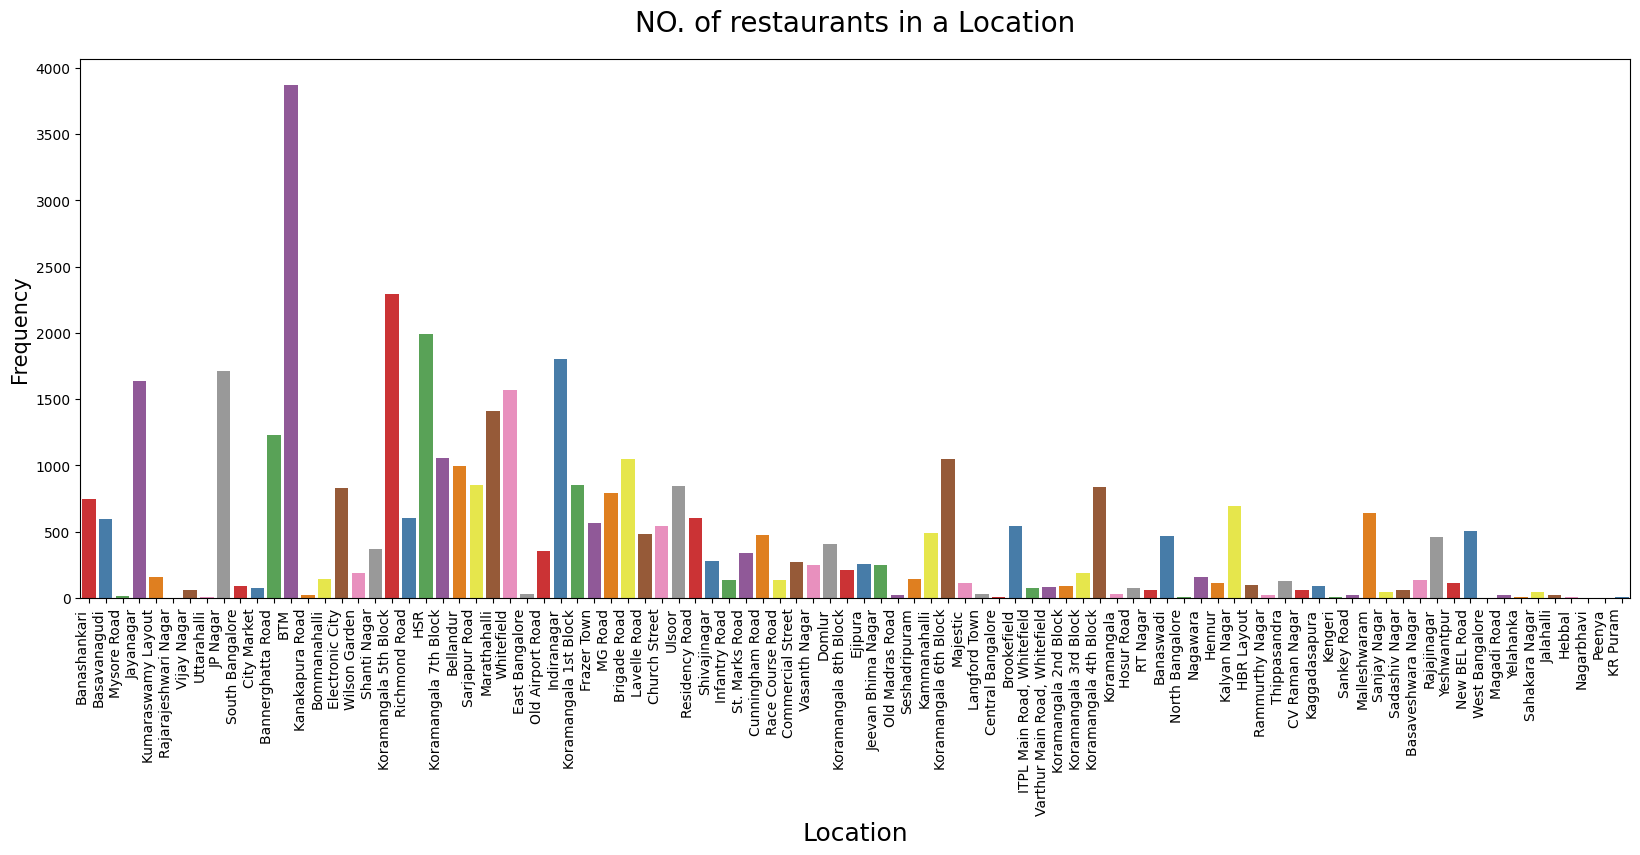

In [103]:
# No. of Restaurants in a Location
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)
plt.savefig("Restaurants in Location")

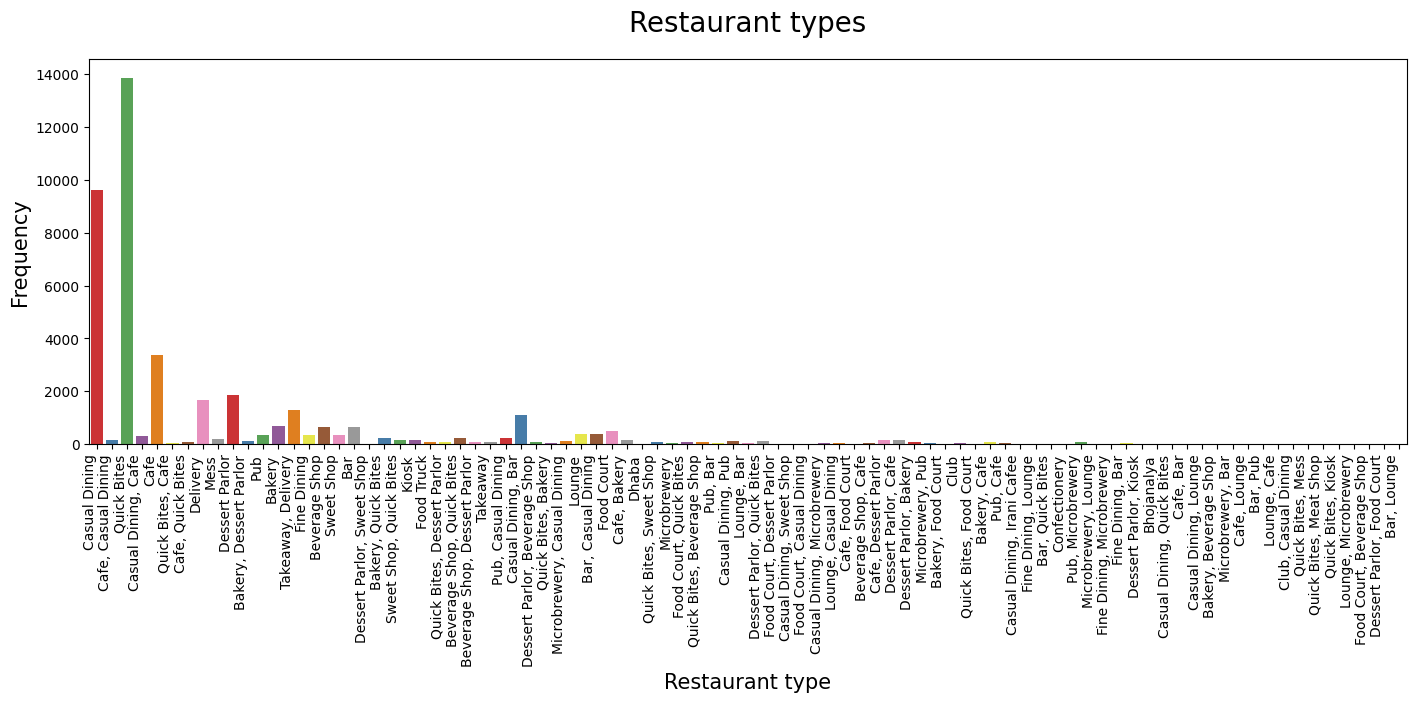

In [104]:
# Restaurant type
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=data, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)
plt.savefig('Restaurant types')

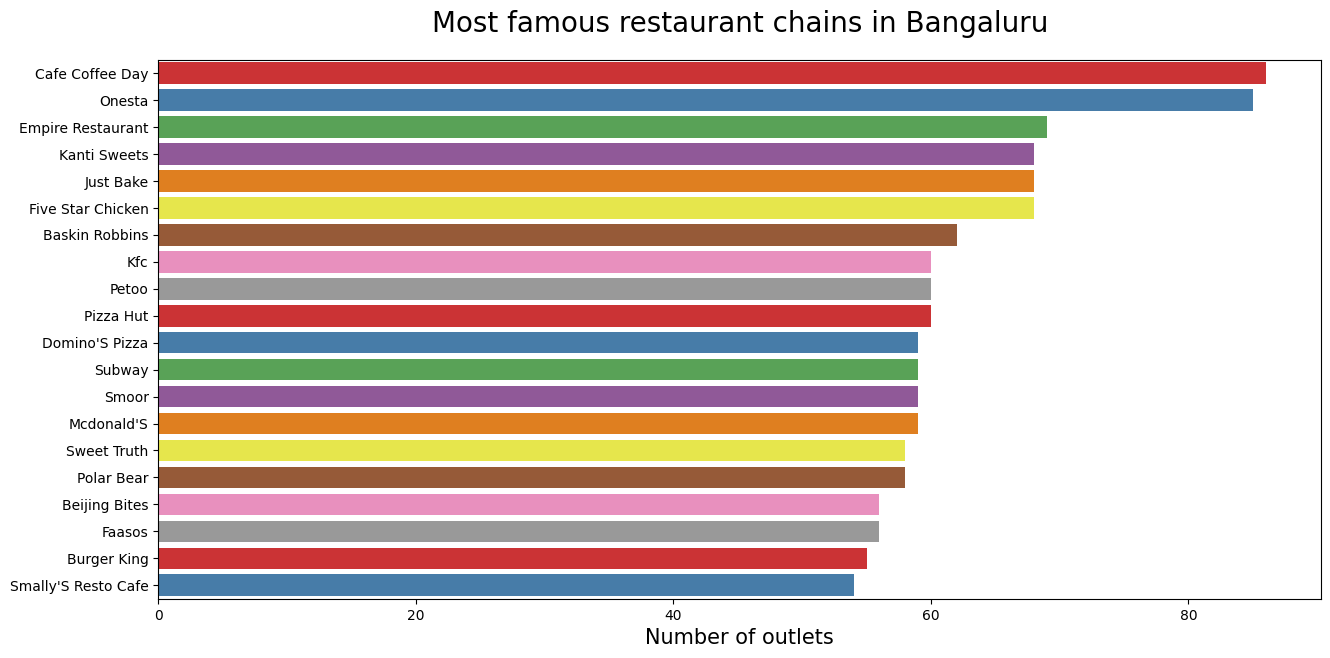

In [108]:
# Most famous Restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.savefig('Most famous restaurant chains')

In [109]:
## Computing Mean Rating
restaurants = list(data['name'].unique())
data['Mean Rating'] = 0

for i in range(len(restaurants)):
    data['Mean Rating'][data['name'] == restaurants[i]] = data['rate'][data['name'] == restaurants[i]].mean()

In [34]:
# data.head()

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
data[['Mean Rating']] = scaler.fit_transform(data[['Mean Rating']]).round(2)
data.sample(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
24841,"906, 6th Block, GNR Plaza, Near Sony World Sig...",Bansuri Sweets,False,False,3.7,73,Koramangala 6th Block,"Sweet Shop, Quick Bites","Mithai, North Indian, Street Food",250.0,"[('Rated 4.0', 'RATED\n A small outlet in kor...",[],Dine-out,Koramangala 5th Block,3.42
11255,"The Sahar Pavilion, 2224/2225, Kudlu Gate, Sin...",Nh7 Resto Pub,False,False,3.3,6,Electronic City,"Casual Dining, Pub","Andhra, Chinese, Continental",1.4,[],[],Dine-out,Electronic City,2.94
1826,"725, 1st Floor, 24th Main, 17th Cross, JP Naga...",Thayee Touch,False,False,3.6,30,JP Nagar,Casual Dining,"North Indian, Chinese, South Indian",450.0,"[('Rated 4.0', 'RATED\n They Should mention i...",[],Dine-out,Bannerghatta Road,3.32


In [36]:
# text preprocessing
# Lower casing
# Removal of Punctuations
# Removal of Stopwords
# Removal of URLs
# Spelling correction

In [39]:
# 5 examples of these columns before text processing:
# data[['reviews_list', 'cuisines']].sample(5)

In [111]:
## Lower Casing
data["reviews_list"] = data["reviews_list"].str.lower()
data[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
8914,"[('rated 3.0', 'rated\n good place to have qu...","Fast Food, American, Chinese"
9834,"[('rated 1.0', 'rated\n weã\x83ã\x83ã\x82ã...","Continental, Pizza, Fast Food"
17149,"[('rated 3.0', 'rated\n it is near my college...","North Indian, Chinese, Biryani"
35785,"[('rated 1.0', 'rated\n mental delivery boy a...",Biryani
17271,"[('rated 3.5', 'rated\n i went to this place ...","Cafe, Fast Food"


In [112]:
# Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["reviews_list"] = data["reviews_list"].apply(lambda text: remove_punctuation(text))
data[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
2498,rated 20 ratedn one of the oldest restaurants...,"Biryani, Mughlai"
24887,rated 20 ratedn food is good ambience is open...,Cafe
38418,,Chinese
40106,rated 40 ratedn great for a quick bite i trie...,"Rolls, Fast Food"
37053,rated 10 ratedn avoid this place i got a deli...,"Biryani, Kebab"


In [113]:
# Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["reviews_list"] = data["reviews_list"].apply(lambda text: remove_stopwords(text))

In [114]:
# Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
data["reviews_list"] = data["reviews_list"].apply(lambda text: remove_urls(text))

In [116]:
data.shape

(41237, 15)

In [117]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [118]:
data=data.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

In [119]:
# Creating tf-idf matrix
# import pandas

# # Randomly sample 60% of your dataframe
# df_percent = data.sample(frac=0.5)
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['reviews_list'])

In [63]:
# cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [120]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score


def recommend(name, knn_model, indices, data, tfidf_matrix, num_recommendations=10):
    idx = indices.get(name)
    if idx is None:
        print(f"{name} not found in the dataset.")
        return None

    if not hasattr(knn_model, '_fit_method'):
        knn_model.fit(tfidf_matrix)

    distances, indices = knn_model.kneighbors(tfidf_matrix[idx], n_neighbors=num_recommendations + 1)
    similar_restaurants = [indices[0][i] for i in range(1, len(indices[0]))]

    recommended_restaurants = data.iloc[similar_restaurants]

    print(f"Top {num_recommendations} restaurants similar to {name}:")
    print(recommended_restaurants[['name', 'cuisines', 'Mean Rating', 'cost']])

knn_model = NearestNeighbors(n_neighbors=30, algorithm='auto', metric='euclidean')

indices = pd.Series(data.index, index=data['name'])

restaurant_name = input("Enter the name of the restaurant: ")

if restaurant_name not in indices:
    print(f"{restaurant_name} not found in the dataset.")
else:
    recommendation = recommend(restaurant_name, knn_model, indices, data, tfidf_matrix)


Enter the name of the restaurant: Jalsa
Top 10 restaurants similar to Jalsa:
                    name                        cuisines  Mean Rating   cost
400                Jalsa  North Indian, Mughlai, Chinese         3.99  800.0
485                Jalsa  North Indian, Mughlai, Chinese         3.99  800.0
2385               Jalsa  North Indian, Mughlai, Chinese         3.99  800.0
1942               Jalsa  North Indian, Mughlai, Chinese         3.99  800.0
16242              Jalsa  North Indian, Mughlai, Chinese         3.99  800.0
15334              Jalsa  North Indian, Mughlai, Chinese         3.99  800.0
16883              Jalsa  North Indian, Mughlai, Chinese         3.99  800.0
3517   Biriyani Bungalow           Biryani, North Indian         3.16  600.0
3515          Juice Berg                          Juices         3.47  200.0
29557          Chaatimes          Street Food, Fast Food         3.55  200.0
